# Exercise 9

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [2]:
df = pd.read_csv ('EFIplus_medit.zip',compression="zip", sep= ";")
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ex 1:

Run agglomerative cluster analysis using different linkage methods based on quantitative
environmental variables (see previous exercise), using sites from the Douro and Tejo basins.

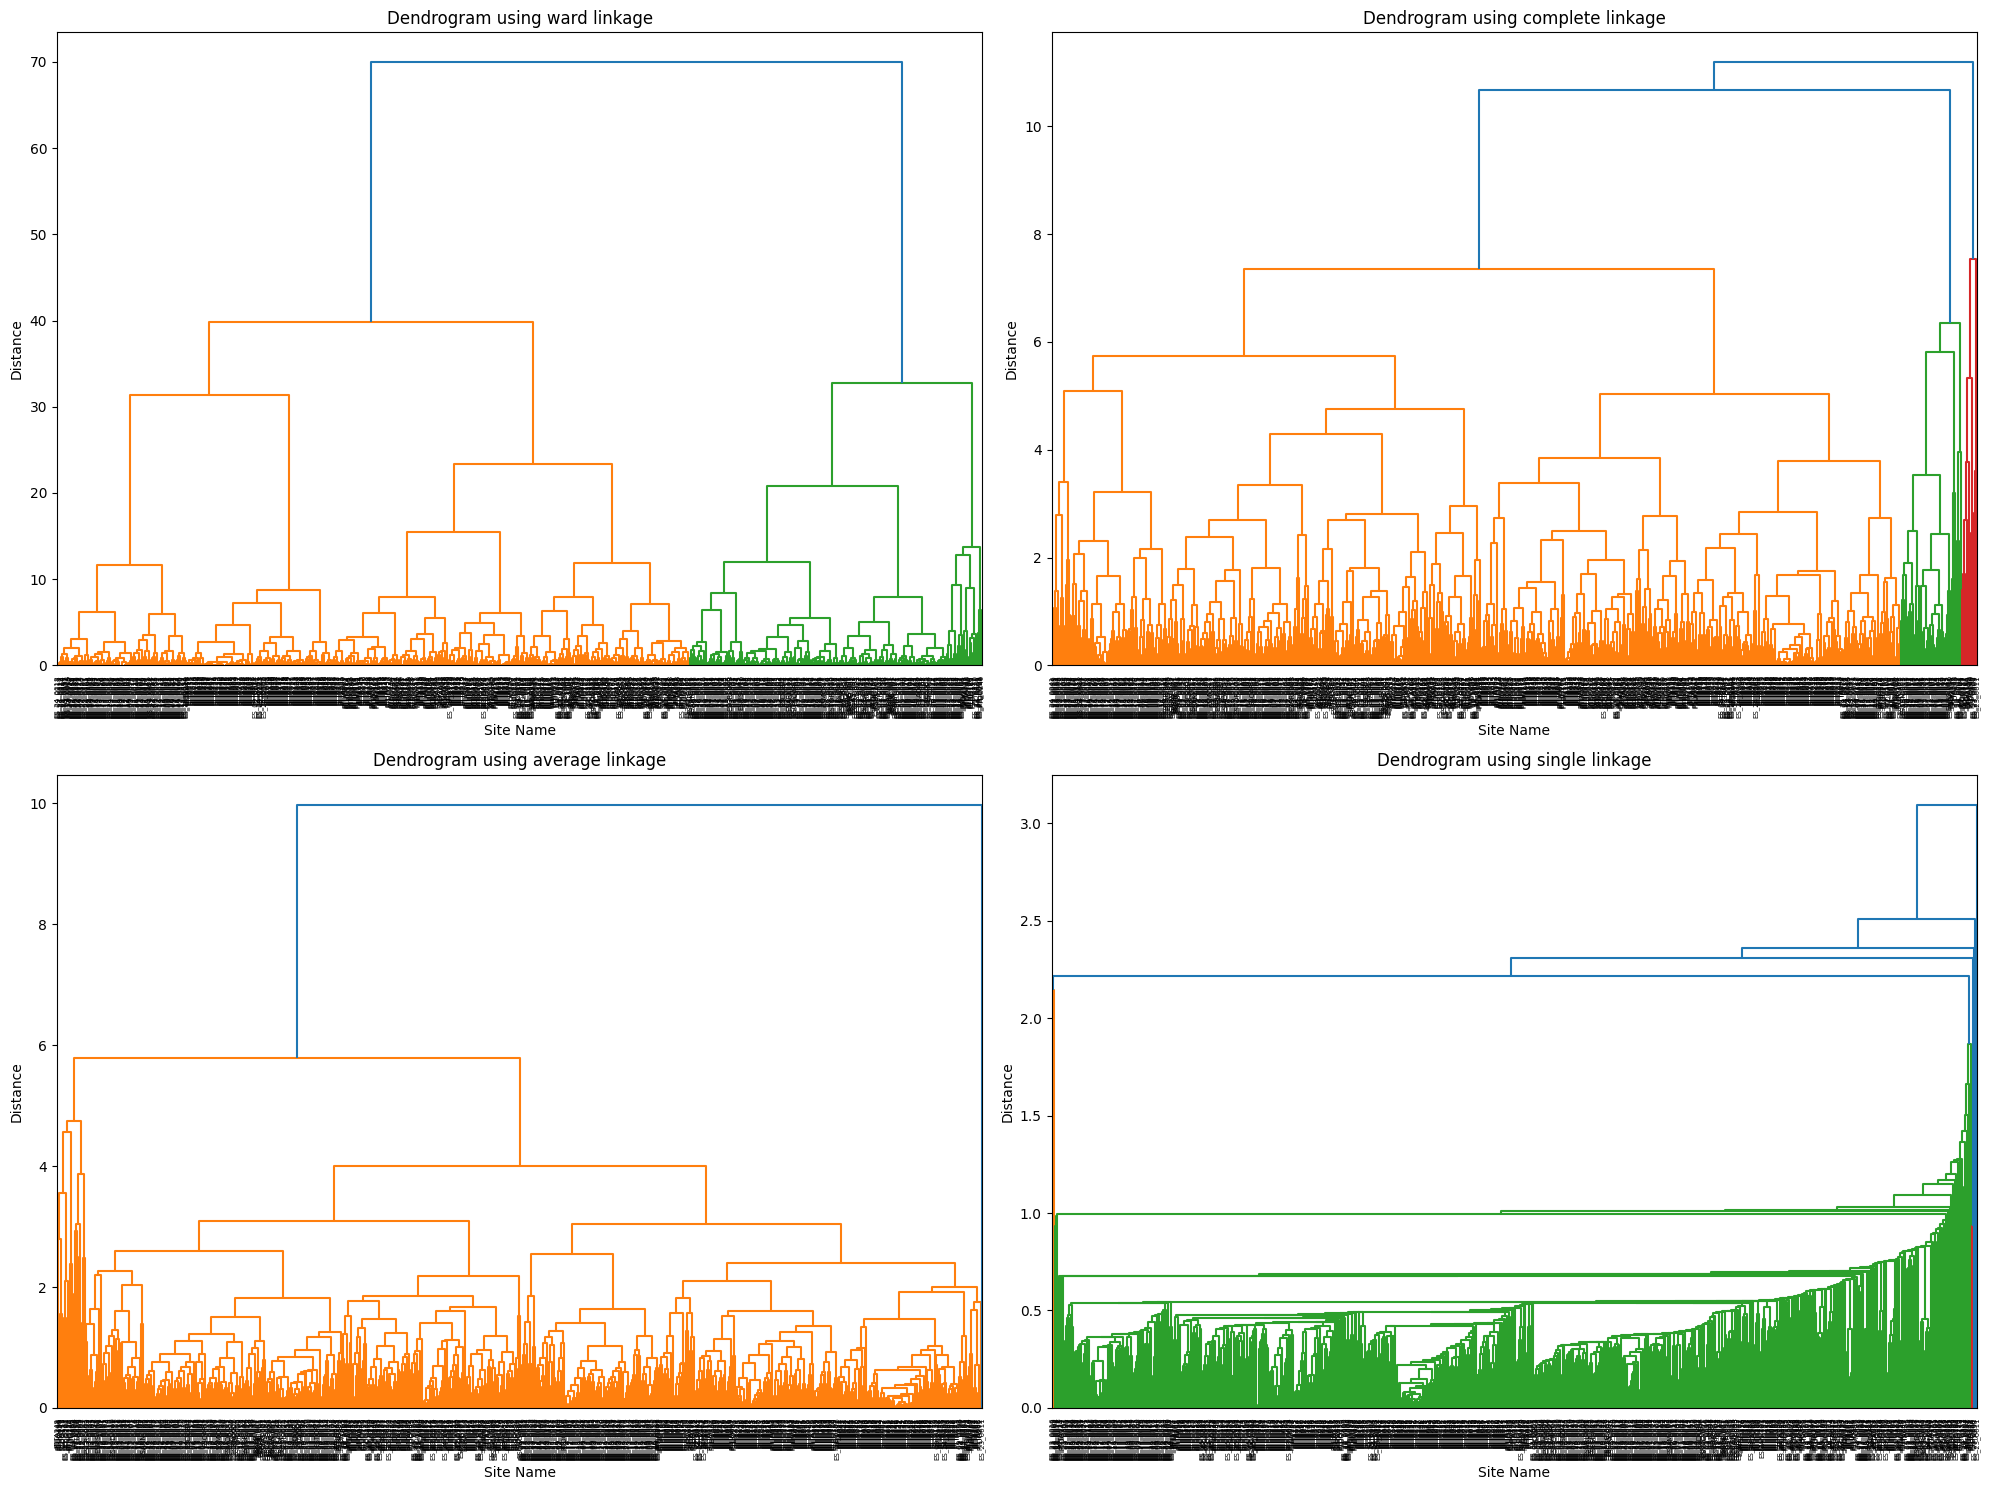

In [11]:
env_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']


df_filtered = df[df['Catchment_name'].isin(['Douro', 'Tejo'])].copy()

# Extracting the environmental variables
X = df_filtered[env_vars]
X_cleaned = X.dropna()
df_filtered_cleaned = df_filtered.loc[X_cleaned.index].copy()

# Standardizing the cleaned data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Performing agglomerative clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(20, 15))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    linked = linkage(X_scaled, method)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=df_filtered_cleaned['Site_code'].tolist())
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Site Name')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

### Ex 2:

 Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage

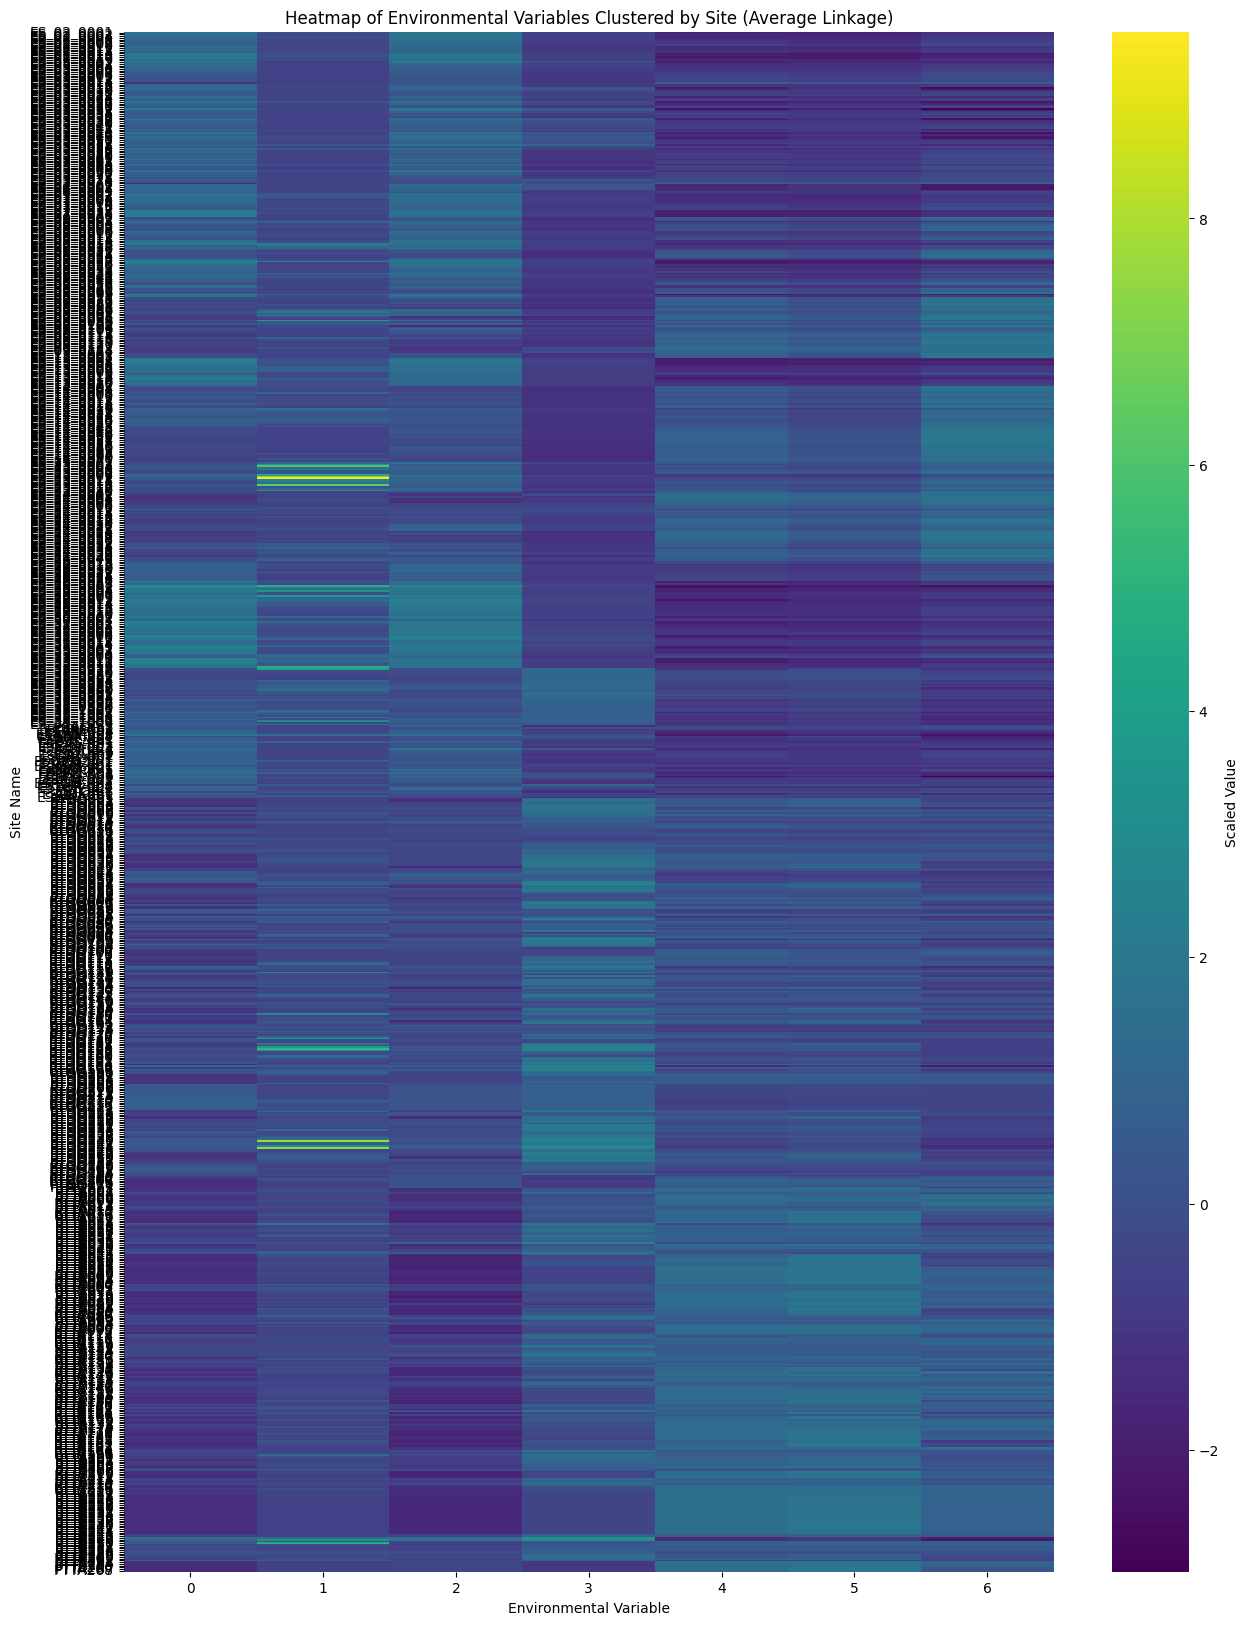

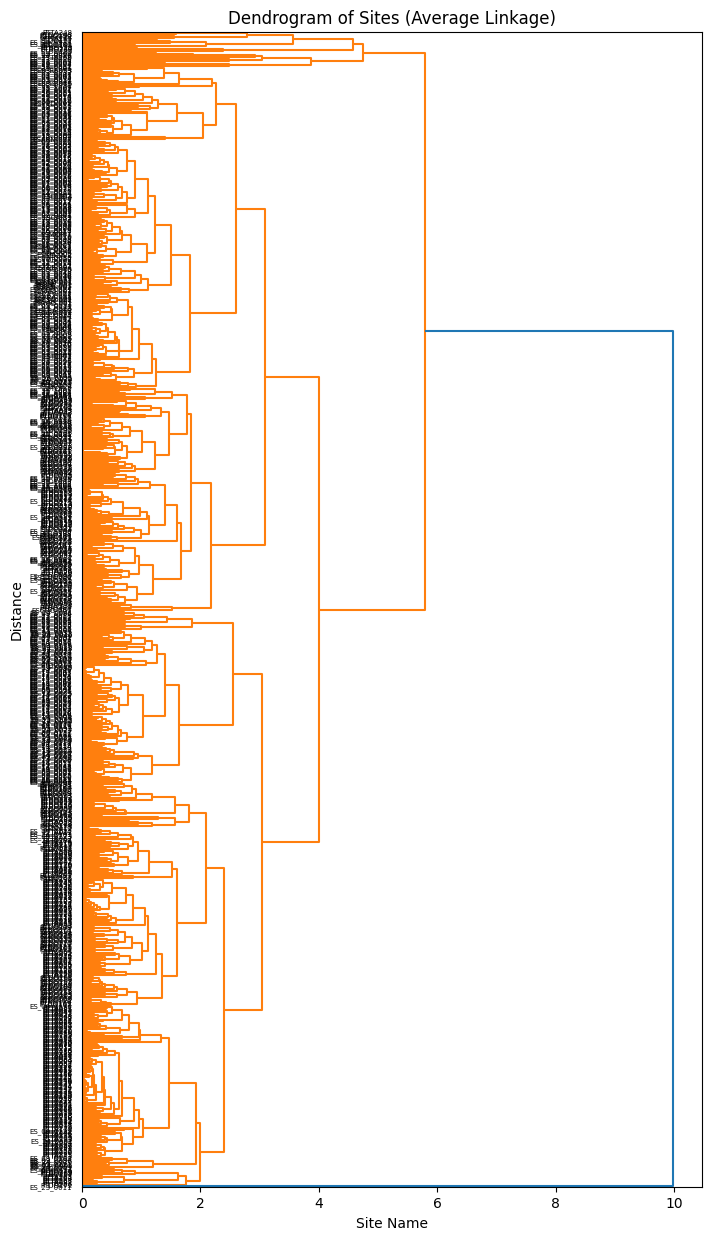

In [28]:
linked_average = linkage(X_scaled, method='average')

# Plot the heatmap with the dendrogram
plt.figure(figsize=(15, 20))
sns.heatmap(X_scaled, yticklabels=df_filtered_cleaned['Site_code'], cmap='viridis', cbar_kws={'label': 'Scaled Value'})
plt.title('Heatmap of Environmental Variables Clustered by Site (Average Linkage)')
plt.xlabel('Environmental Variable')
plt.ylabel('Site Name')

plt.figure(figsize=(8, 15))
dendrogram(linked_average,
           labels=df_filtered_cleaned['Site_code'].tolist(),
           p=50,
           orientation= 'right')
plt.title('Dendrogram of Sites (Average Linkage)')
plt.xlabel('Site Name')
plt.ylabel('Distance')

plt.show()

### Ex 3:

 Plot a dendrogram that clusters the environmental variables instead (columns) using average
linkage – discuss how this would help to select variables for e.g. a regression-based analysis

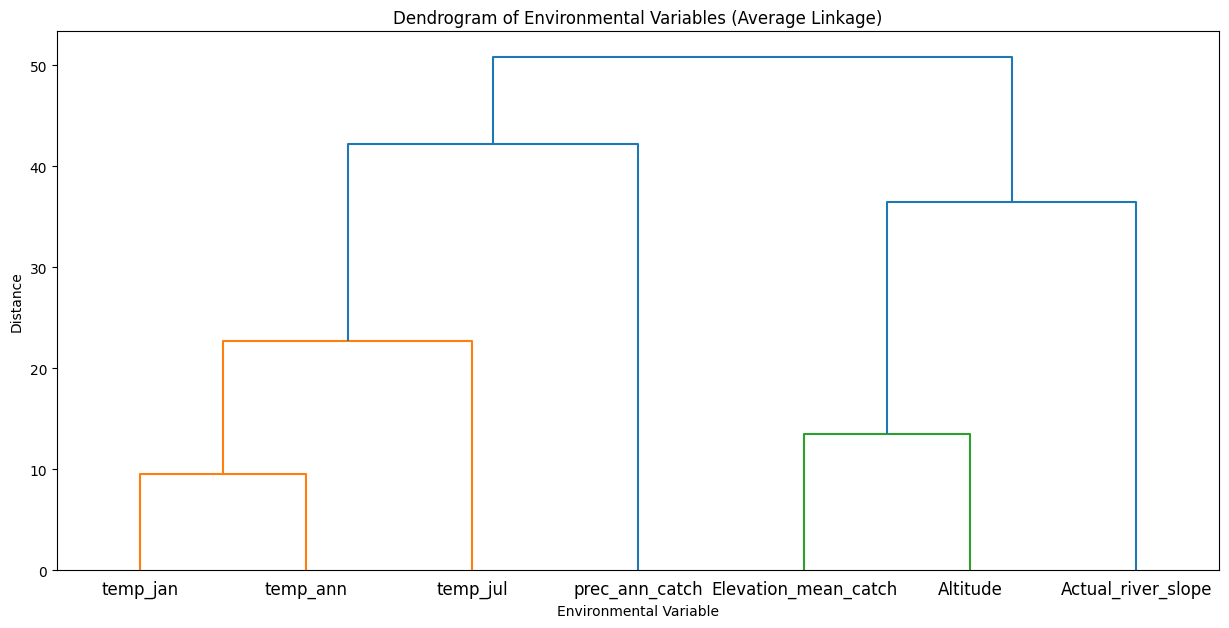

In [23]:
# Transpose the standardized data to cluster columns (variables)
X_scaled_T = X_scaled.T

linked_vars_average = linkage(X_scaled_T, method='average')


variable_labels = X_cleaned.columns.tolist()

# Plot the dendrogram for the environmental variables
plt.figure(figsize=(15, 7))
dendrogram(linked_vars_average, labels=variable_labels, orientation='top', distance_sort='descending')
plt.title('Dendrogram of Environmental Variables (Average Linkage)')
plt.xlabel('Environmental Variable')
plt.ylabel('Distance')

plt.show()


This dendrogram clusters the environmental variables based on their similarity across the selected sites.
Variables that are close together in the dendrogram (forming small clusters) are highly correlated.
For a regression-based analysis, this dendrogram helps in identifying:
1. Multicollinearity: Clusters of highly correlated variables suggest multicollinearity. Including all variables from such a cluster in a regression model can lead to unstable coefficient estimates and inflated standard errors.

2. Variable Selection: Variables that are more isolated or in distinct clusters might capture unique aspects of the environment and could be better predictors.